In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_profiling
import sys, os
sys.path.insert(0, os.path.abspath('..'))

In [43]:
import scripts.project_functions
df = scripts.project_functions.load_and_process(r"..\data\raw\UniversitiesDataSet.csv")
df.head(10)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,Score - Avg
0,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014,53.13615
1,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014,52.22615
2,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014,51.82615
3,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014,50.77615
4,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014,50.64615
5,6,Columbia University,USA,4,13,8,9,14,13,9,13.0,4,97.41,2014,50.54615
6,7,"University of California, Berkeley",USA,5,4,22,6,7,4,3,7.0,28,92.84,2014,45.97615
7,8,University of Chicago,USA,6,10,14,8,17,19,10,18.0,149,92.03,2014,45.16615
8,9,Princeton University,USA,7,5,16,3,70,25,19,41.0,204,88.56,2014,41.69615
9,10,Yale University,USA,8,9,25,11,18,7,32,19.0,45,88.11,2014,41.24615


In [44]:
df = df.dropna().reset_index(drop=True) 

<AxesSubplot:>

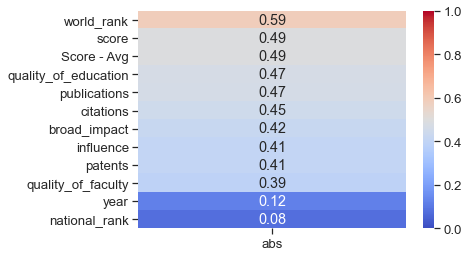

In [29]:
correlations = df.corrwith(df['alumni_employment']).to_frame().drop('alumni_employment')
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values(['abs'], ascending=False)['abs']
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=0, vmax=1)

The above shows correlation between alumni employment and all other variables.  Individual impacts to alumni employment will be discussed further below.  World rank is the best predictor of alumni employment, whereas national rank was the worst predictor.  Many other variables, such as score, quality of education, and influence had moderate correlation to employment of students post-graduation.

C:\Users\ww\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Country vs. Alumni Employment rate')

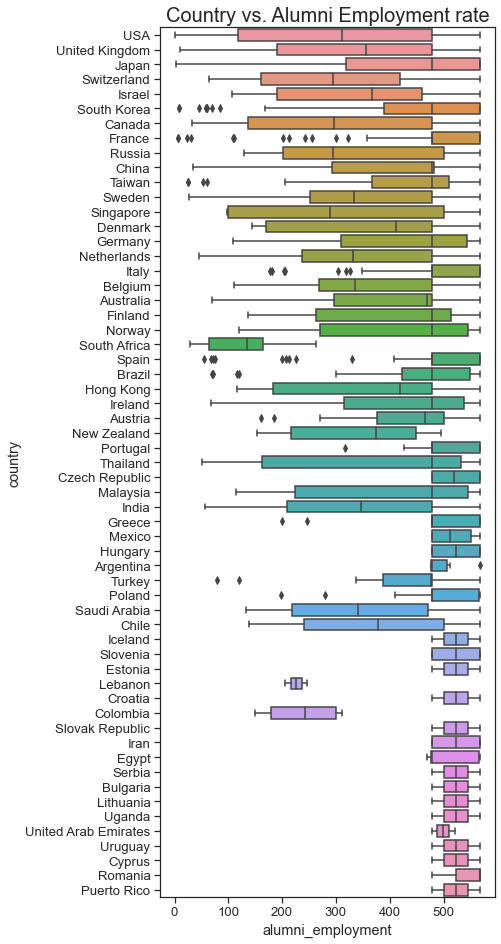

In [45]:
def country_plot(df):
    plt.figure(figsize=(6, 16))
    return sns.boxplot(df['alumni_employment'], df['country']).set_title('Country vs. Alumni Employment rate', fontsize = 20)
country_plot(df)

Countries vs Alumni Employment for all the years:
1. The variation in alumni employment is very high in some countries (i.e. USA), and very small in other countries (i.e. Puerto Rico)
2. This variation is likely related to the number of universities each country has on the top 1000 list.

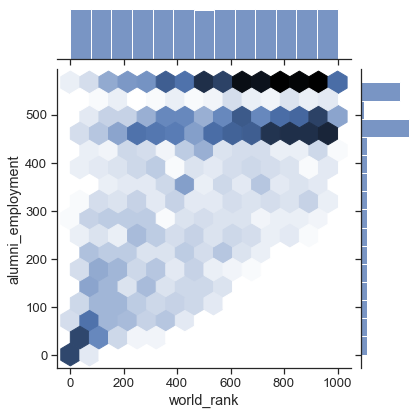

In [50]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.jointplot(data=df, x="world_rank", y="alumni_employment", kind = 'hex')

The above shows the correlation between alumni employment and world rank.  A positive correlation is observed between the two variables, as a majority of points trend in this direction.  Generally, lower world rank is accompanied by greater alumni employment post-graduation.

Text(0.5, 1.0, 'Correlation of National Rank with Alumni Employment')

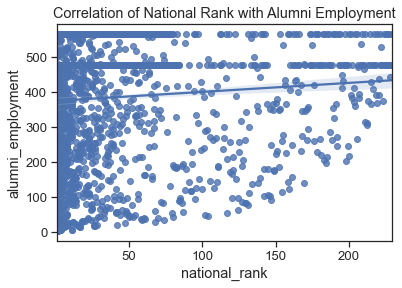

In [55]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.regplot(data=df, x="national_rank", y="alumni_employment").set_title("Correlation of National Rank with Alumni Employment")

The above shows the correlation between alumni employment and national rank.  No prominent correlation is observed for these two variables, as the points don''t tend to follow a trend.  Generally, national rank is not a strong predictor of alumni employment post-graduation.  This is likely due to varations in the quality of each countries institutions.

Text(0.5, 1.0, 'Correlation of Score with Alumni Employment')

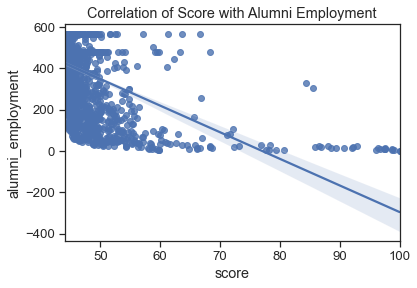

In [54]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.regplot(data=df, x="score", y="alumni_employment").set_title("Correlation of Score with Alumni Employment")

The above shows the correlation between alumni employment and score.  A negative correlation is observed between the two variables, as a majority of points trend in this direction.  Generally, greater score is accompanied by greater alumni employment post-graduation.  As score likley takes into account all variables that an institution may be judged on, it is likely an accurate predictor of alumni employment.

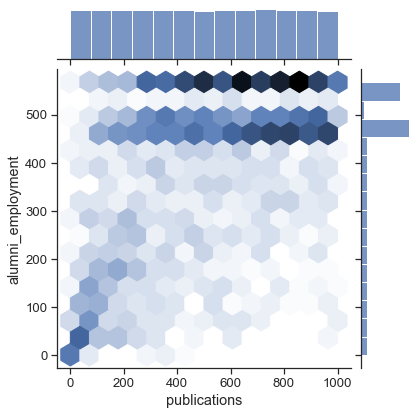

In [56]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.jointplot(data=df, x="publications", y="alumni_employment", kind = 'hex')

The above shows the correlation between alumni employment and publications.  A weak positive correlation is observed between the two variables, as some of points trend in this direction.  Generally, greater number of publications is accompanied by greater alumni employment post-graduation.  This may be due to increased publications indicating an increased participation in research at the institution, leading to more students pursuing further education than employment post-graduation.

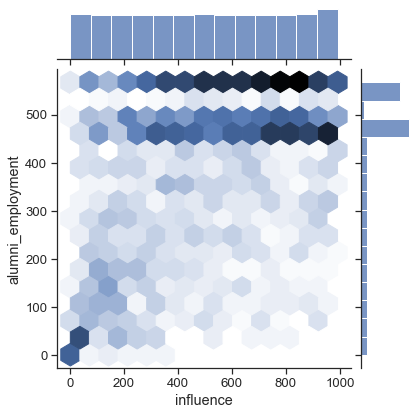

In [58]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.jointplot(data=df, x="influence", y="alumni_employment", kind = 'hex')

The above shows the correlation between alumni employment and influence. A positive correlation is observed between the two variables, as most of points trend in this direction. Generally, greater influence is accompanied by greater alumni employment post-graduation. This is likely due to employers being more likely to hire potential employees from more well-known, historically well ranked prestigious universities.

Text(0.5, 1.0, 'Correlation of Quality of Education with Alumni Employment')

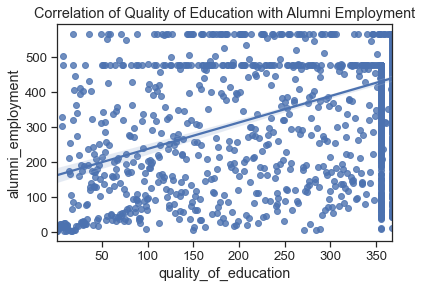

In [60]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.regplot(data=df, x="quality_of_education", y="alumni_employment").set_title("Correlation of Quality of Education with Alumni Employment")

The above shows the correlation between alumni employment and quality of education. A generally positive correlation is observed between the two variables, as some of points trend in this direction. Generally, greater quality of education is accompanied by greater alumni employment post-graduation. This is likely due to students having graduated from institutions with a higher quality education being better suited to the demands of the workforce, and therefore are more likely to be hired.

Text(0.5, 1.0, 'Correlation of Quality of Faculty with Alumni Employment')

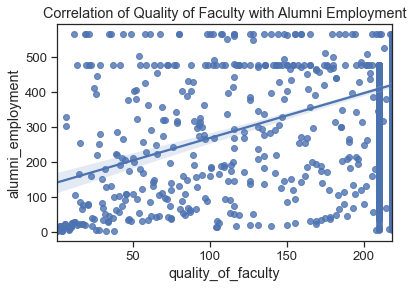

In [62]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.regplot(data=df, x="quality_of_faculty", y="alumni_employment").set_title("Correlation of Quality of Faculty with Alumni Employment")

The above shows the correlation between alumni employment and quality of faculty. A generally positive correlation is observed between the two variables, as some of points trend in this direction. Generally, greater quality of faculty is accompanied by greater alumni employment post-graduation.  Increased faculty quality improves quality of education to be delivered to students, increasing their suitability for hiring by potential employers.

Text(0.5, 1.0, 'Correlation of Citations with Alumni Employment')

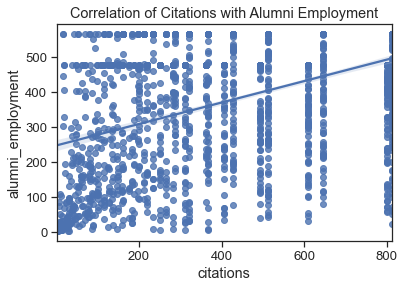

In [64]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.regplot(data=df, x="citations", y="alumni_employment").set_title("Correlation of Citations with Alumni Employment")

The above shows the correlation between alumni employment and citations. A generally positive correlation is observed between the two variables, as some of points trend in this direction. Generally, a lower rank in citations is accompanied by greater alumni employment post-graduation.  Increased number of citations likely increases the prestige of the university from a research standpoint, making employers more likely to hire employees from certain institutions.

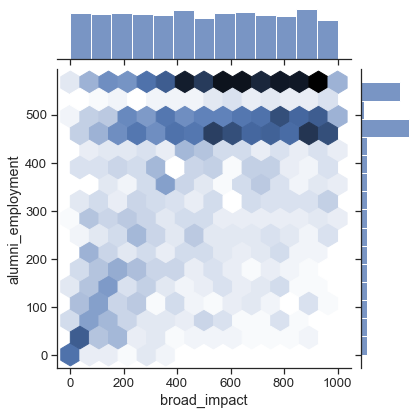

In [65]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.jointplot(data=df, x="broad_impact", y="alumni_employment", kind = 'hex')

The above shows the correlation between alumni employment and broad impact. A generally positive correlation is observed between the two variables, as most of points trend in this direction. Generally, a lower rank in broad impact is accompanied by greater alumni employment post-graduation.  Increased broad impact likely increases community knowledge of the university, making potential employers more likely to hire employees from certain institutions.

Text(0.5, 1.0, 'Correlation of Patents with Alumni Employment')

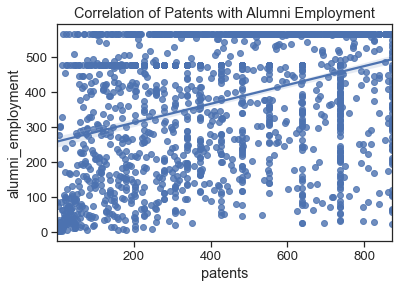

In [67]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.regplot(data=df, x="patents", y="alumni_employment").set_title("Correlation of Patents with Alumni Employment")

The above shows the correlation between alumni employment and patents. A generally weaker positive correlation is observed between the two variables, as some of points trend in this direction. Generally, an increased number of patents is accompanied by greater alumni employment post-graduation.  Correlation is slightly weaker in this variable as increased patents indicate increased research around their formation, and therefore more students pursuing further education than employment.

Text(0.5, 1.0, 'Correlation of Score - Average with Alumni Employment')

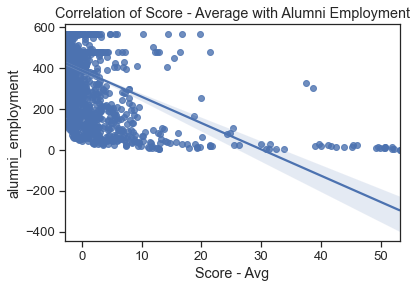

In [69]:
sns.set_theme(style="ticks", font_scale=1.2)
sns.regplot(data=df, x="Score - Avg", y="alumni_employment").set_title("Correlation of Score - Average with Alumni Employment")

The above shows the correlation between alumni employment and score in relation to average. A strong negative correlation is observed between the two variables, as some of points trend in this direction. Generally, an increased score above the average is accompanied by greater alumni employment post-graduation.  As this variable encompasses all other variables, and is compared to other institutions, it likely provides a strong indicator of alumni employment.

**Overall Summary:**

The above analysis examines the factors that can positively and negatively impact an institutions alumni employment, based on the “World Universities Dataset” from Kaggle.  It looks to examine the world’s top universities for the years 2014-2015, and seeks to provide important information to students about prospects of post-graduation employment based on their individual institution’s characteristics.
Based on regression analyses of all variables compared to alumni employment, the weight of an institutions strengths in certain areas was able to be determined.  The universities ranking on a world scale was correlated most highly with alumni employment (0.59), likely due to increased prestige of the university improving likelihood of employees to consider a student’s application.  Other variables, such as overall score, citations, influence, and patents all had modest but present correlations with alumni employment (0.39-0.49).  However, national rank had no significant correlation with alumni employment (0.08), likely due to a wide range of institutions present in developed versus developing countries.

**Advice to Students:**

Based on our analysis, our advice to students is as follows:

- If considering studying at multiple universities, the institution ranked highest on the world rankings would likely provide the best chances for employment post-graduation.
